## Cross data set time series forecasting using ARIMA and LSTM

### Data preprocessing, EDA

Data Link: 

NVDA data = https://uk.finance.yahoo.com/quote/NVDA?p=NVDA     
BTC-USD data = https://uk.finance.yahoo.com/quote/BTC-USD?p=BTC-USD

Time Range:     
Start Date: 2014-09-17   
End Date: 2023-11-12

In [2]:
!pip install pandas

In [8]:
!pip install matplotlib

In [9]:
!pip install sklearn

  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [10]:
!pip install seaborn

In [11]:
# Importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading of the dataset
data1 = pd.read_csv('NVDA.csv') # NVIDIA data set

# Uncomment the below line of code if we want to analyze BTC-USD data set (crypto)
# data1 = pd.read_csv('BTC-USD.csv') # Bitcoin data set

In [12]:
# Displaying basic information about the dataset
print("Basic Information about the Dataset:")
print(data1.info(verbose=None, buf=None, max_cols=None, memory_usage=None, show_counts=None))

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2305 non-null   object 
 1   Open       2305 non-null   float64
 2   High       2305 non-null   float64
 3   Low        2305 non-null   float64
 4   Close      2305 non-null   float64
 5   Adj Close  2305 non-null   float64
 6   Volume     2305 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 126.2+ KB
None


In [13]:
# Display the first few rows of the dataset
print("\nSample of the Dataset:")
print(data1.head(n=5))

# Description of statistics
print("\nSummary Statistics:")
print(data1.describe(percentiles=None, include=None, exclude=None))

# Checking for missing values
print("\nNumber of missing Values:")
print(data1.isnull().sum())


Sample of the Dataset:
         Date    Open    High     Low   Close  Adj Close    Volume
0  2014-09-17  4.7725  4.8325  4.7500  4.7875   4.578554  17358400
1  2014-09-18  4.8175  4.8650  4.8025  4.8600   4.647889  21960400
2  2014-09-19  4.8750  4.8800  4.7625  4.7700   4.561820  60131600
3  2014-09-22  4.8675  4.8675  4.7175  4.7225   4.516392  22146400
4  2014-09-23  4.6975  4.7550  4.6800  4.7025   4.497263  19614400

Summary Statistics:
              Open         High          Low        Close    Adj Close  \
count  2305.000000  2305.000000  2305.000000  2305.000000  2305.000000   
mean    102.553175   104.449378   100.600690   102.611079   102.337142   
std     111.170118   113.222123   108.998550   111.177143   111.228515   
min       4.232500     4.325000     4.192500     4.197500     4.014305   
25%      24.642500    24.985001    24.350000    24.684999    24.363161   
50%      56.750000    57.587502    55.549999    56.560001    56.004223   
75%     151.080002   153.524994   1

In [ ]:
# Convert a scalar 'Date' column to datetime object
data1['Date'] = pd.to_datetime(data1['Date'],origin='unix', cache=True)

# Sort the values along the y axis (date)
data1.sort_values(by='Date', inplace=False, kind='quicksort', na_position='last')

# Set 'Date' column as the index using existing column
data1.set_index('Date', inplace=False, drop=True, append=False)

# Check for duplicate values along the rows of data
print("Duplicate Rows:", data1.duplicated(subset=None, keep='first').sum())

# Drop specific columns which are unnecessary
data1.drop(['Open', 'High', 'Low', 'Volume', 'Close'], axis=1, inplace=False, index=None, columns=None, level=None)

# Feature Engineering: Create additional features if needed

# Normalize the 'Close' column using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False) # transform features by scaling each feature to a given range.
# transforming the  column adj close
data1['Adj Close'] = scaler.fit_transform(data1['Adj Close'].values.reshape(-1, 1))

# Display the preprocessed data
print("Preprocessed Data:")
print(data1.head(n=5)) # display the 1st 5 rows of data

# Save the preprocessed data to a new CSV file
data1.to_csv('NVDA_preprocessed.csv')

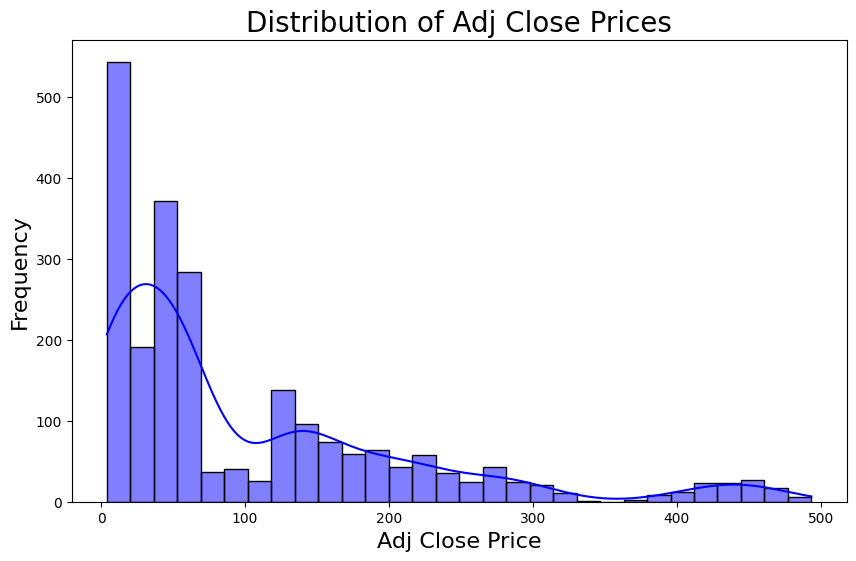

In [14]:
# Plotting of histogram chart
plt.figure(figsize=(10, 6), facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
# To show distribution of data set
sns.histplot(data1['Adj Close'], bins=30, kde=True, color='blue', discrete=None, cumulative=False, hue=None, weights=None)
# Title of the plot
plt.title('Distribution of Adj Close Prices', fontsize=20, loc='center', pad=None)
# Set X axis label
plt.xlabel('Adj Close Price', fontsize=16, fontdict=None, labelpad=None)
# Set y axis label
plt.ylabel('Frequency', fontsize=16, fontdict=None, labelpad=None)
plt.show()

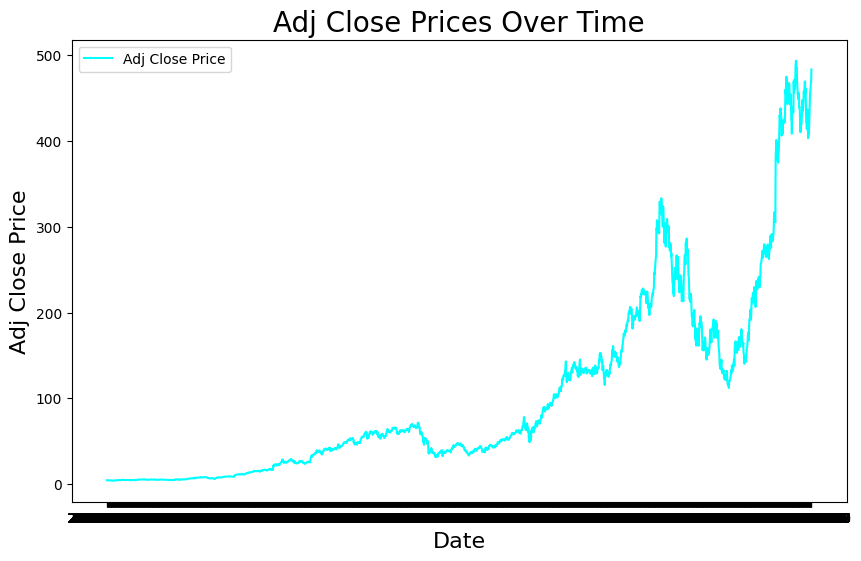

In [15]:
# Plotting of line chart
plt.figure(figsize=(10, 6),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
# plotting data over x and y axis
plt.plot(data1['Date'], data1['Adj Close'], label='Adj Close Price', color='cyan', scalex=True, scaley=True)
# Title of the plot
plt.title('Adj Close Prices Over Time', fontsize=20, loc='center', pad=None)
# Set X axis label
plt.xlabel('Date', fontsize=16, fontdict=None, labelpad=None)
# Set y axis label
plt.ylabel('Adj Close Price', fontsize=16, fontdict=None, labelpad=None)
# Discribing elements of a graph in a particular area
plt.legend(loc=None, numpoints=None, markerscale=None, markerfirst=True)
plt.show()

<ipython-input-17-afbbc6e27456>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data1.corr(method='pearson', min_periods=1)


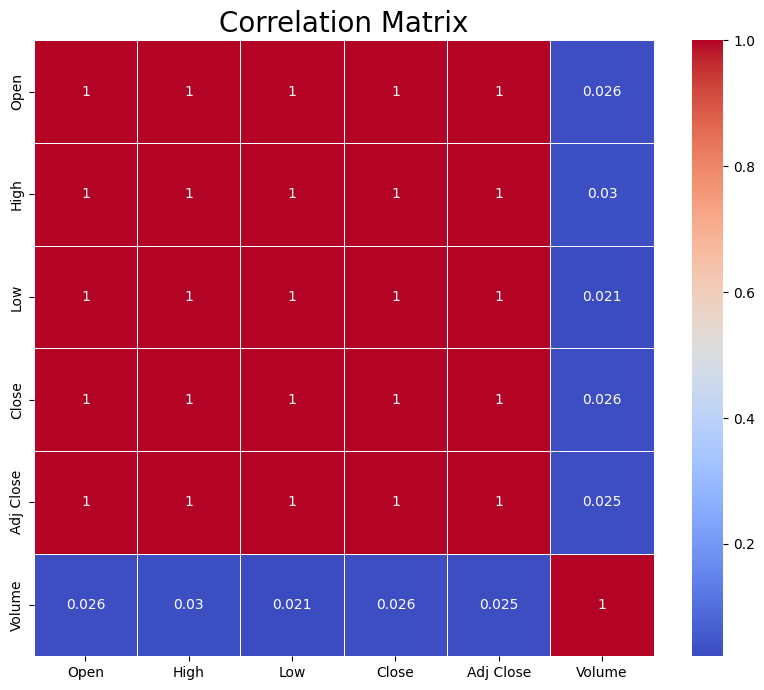

In [17]:
# computing pair wise correlation of columns - Correlation matrix
correlation_matrix = data1.corr(method='pearson', min_periods=1)
# plot the elements
plt.figure(figsize=(10, 8), facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
# plotting of rectangular data
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar=True, square=False)
# Title of the plot
plt.title('Correlation Matrix', fontsize=20, loc='center', pad=None)
plt.show()

In [18]:
# Checking of the time range of the dataset
print("\nTime Range:")
print("Start Date:", data1['Date'].min()) #starting range
print("End Date:", data1['Date'].max()) # ending range


Time Range:
Start Date: 2014-09-17
End Date: 2023-11-10


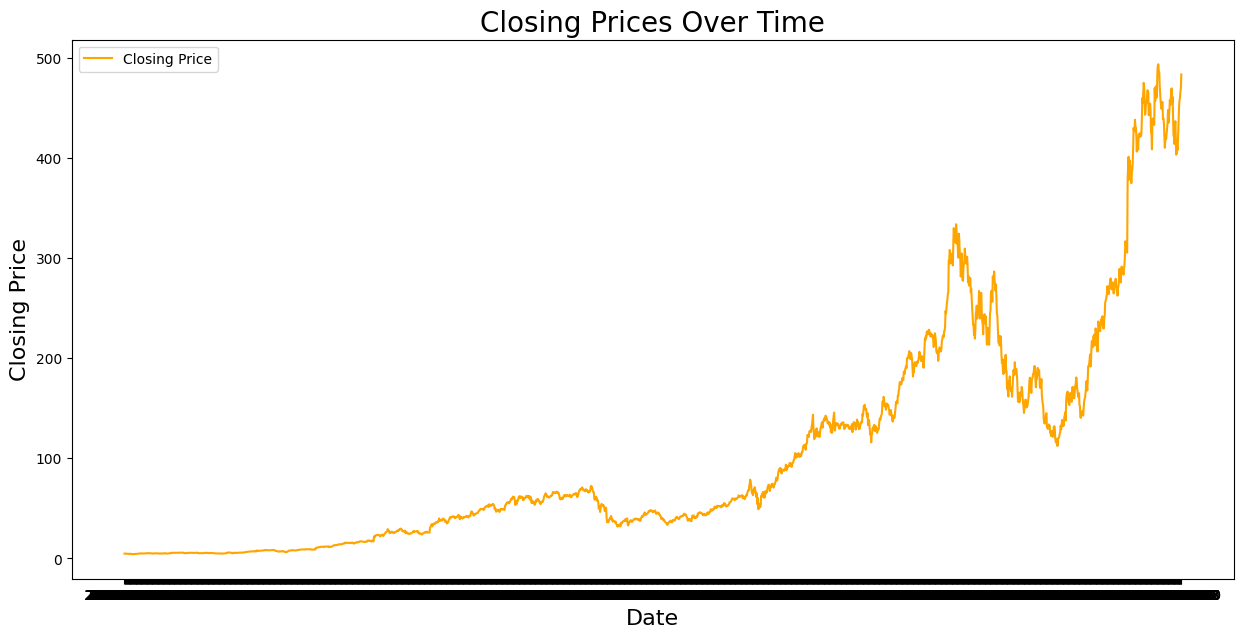

In [19]:
# Visualize the closing prices over time
plt.figure(figsize=(15, 7),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
# plotting data over x and y axis
plt.plot(data1['Date'], data1['Close'], label='Closing Price', color='orange', scalex=True, scaley=True)
# Title of the plot
plt.title('Closing Prices Over Time', fontsize=20, loc='center', pad=None)
# Set X axis label
plt.xlabel('Date', fontsize=16, fontdict=None, labelpad=None)
# Set Y axis label
plt.ylabel('Closing Price', fontsize=16, fontdict=None, labelpad=None)
# Discribing elements of a graph in a particular area
plt.legend(loc=None, numpoints=None, markerscale=None, markerfirst=True)
plt.show()

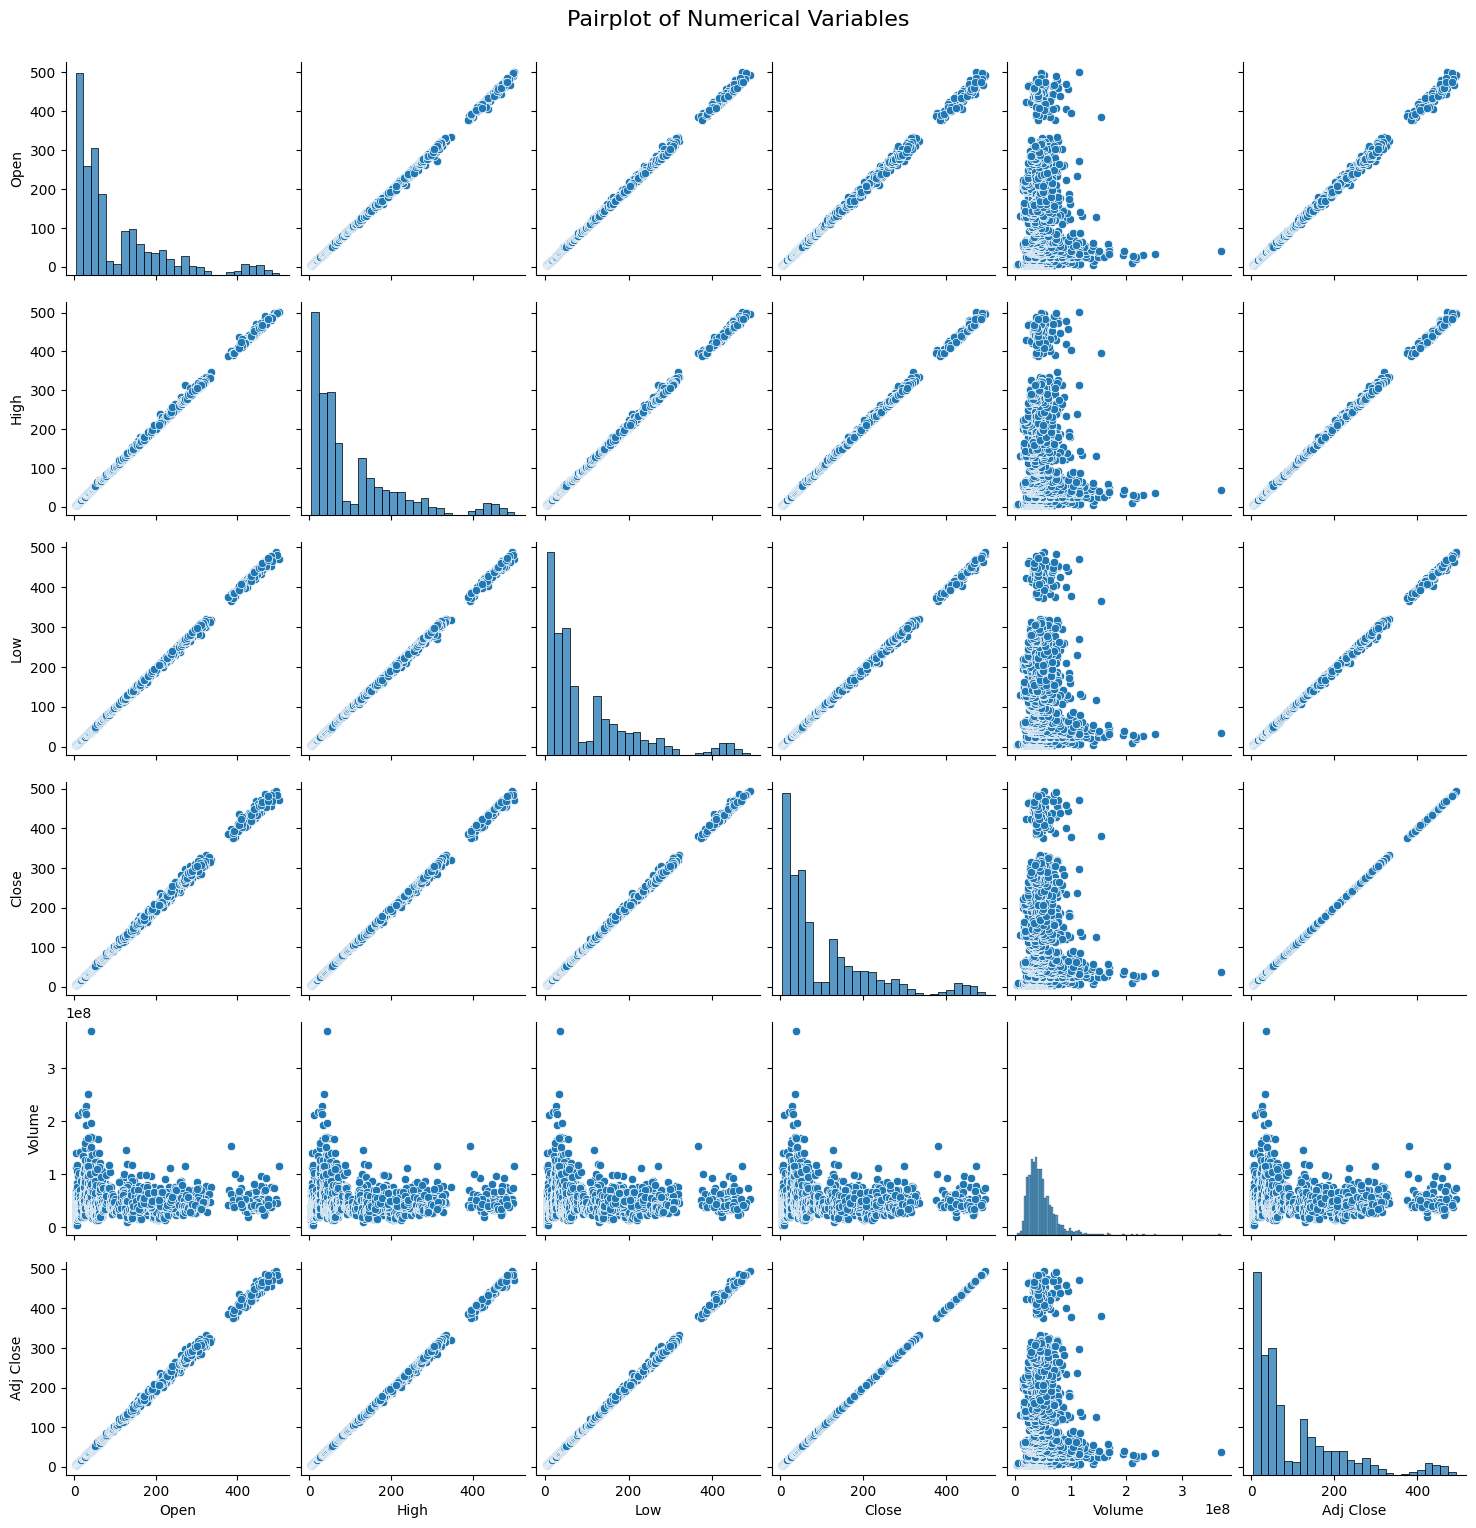

In [20]:
# Plot pairwise relationships for numerical variables
sns.pairplot(data1[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']],height=2.5, aspect=1, corner=False)
# adding of centered suptitle to the figure
plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=16)
plt.show()

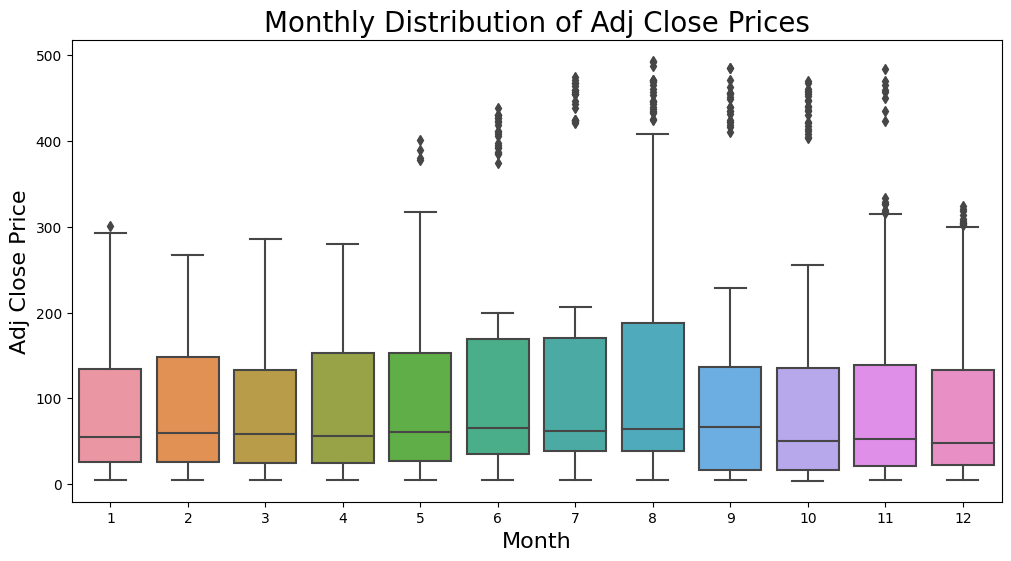

In [25]:
# Boxplot for 'Adj Close' prices by month
data1['Month'] = pd.to_datetime(data1['Date']).dt.month
# Visualize the boxplot over 30 day widow size i.e, each month distribution
plt.figure(figsize=(12, 6),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
# distributions with respect to adj close each month
sns.boxplot(x='Month', y='Adj Close', data=data1)
# Title of the plot
plt.title('Monthly Distribution of Adj Close Prices',fontsize=20, loc='center', pad=None)
# Set X axis label
plt.xlabel('Month', fontsize=16, fontdict=None, labelpad=None)
# Set Y axis label
plt.ylabel('Adj Close Price', fontsize=16, fontdict=None, labelpad=None)
plt.show()

# Rolling Mean and Standard Deviation of 'Adj Close' prices
window_size = 30
# calculating rolling mean and then creating a new column for storing results
data1['Rolling_Mean'] = data1['Adj Close'].rolling(window=window_size).mean()
# calculating rolling standard deviation and then creating a new column for storing results
data1['Rolling_Std'] = data1['Adj Close'].rolling(window=window_size).std()

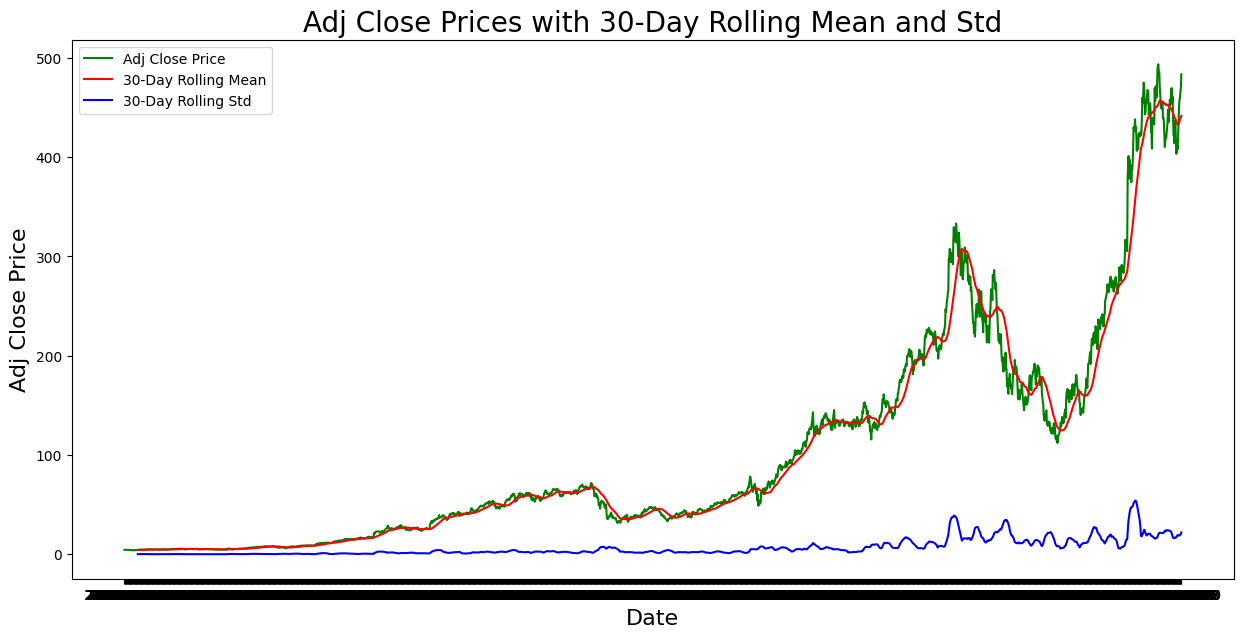

In [26]:
# Visualize the plots over time
plt.figure(figsize=(15, 7),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
# plotting data over x and y axis
plt.plot(data1['Date'], data1['Adj Close'], label='Adj Close Price', color='green', scalex=True, scaley=True)
plt.plot(data1['Date'], data1['Rolling_Mean'], label=f'{window_size}-Day Rolling Mean', color='red', scalex=True, scaley=True)
plt.plot(data1['Date'], data1['Rolling_Std'], label=f'{window_size}-Day Rolling Std', color='blue', scalex=True, scaley=True)
# Title of the plot
plt.title(f'Adj Close Prices with {window_size}-Day Rolling Mean and Std', fontsize=20, loc='center', pad=None)
# Set X axis label
plt.xlabel('Date', fontsize=16, fontdict=None, labelpad=None)
# Set Y axis label
plt.ylabel('Adj Close Price', fontsize=16, fontdict=None, labelpad=None)
# Discribing elements of a plot in a particular area
plt.legend(loc=None, numpoints=None, markerscale=None, markerfirst=True)
plt.show()

ARIMA **Model**

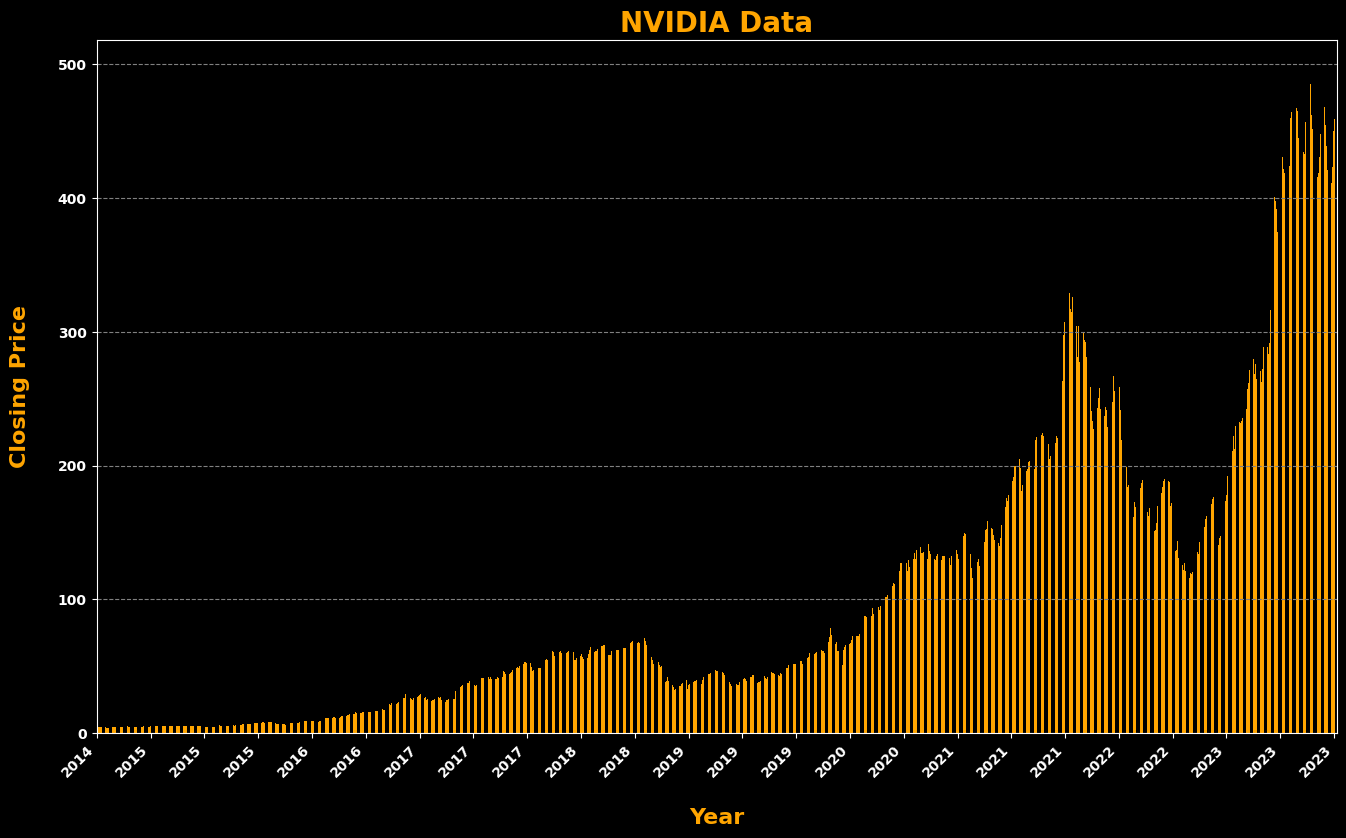

In [37]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# reading the NVIDIA csv file into data frame
stock_data = pd.read_csv('NVDA.csv', encoding_errors='strict', dialect=None)

# reading the BTC-USD csv file into data frame
# stock_data = pd.read_csv('BTC-USD.csv', encoding_errors='strict', dialect=None)

# Convert the Date column to datetime format and extract the year
stock_data['Year'] = pd.to_datetime(stock_data['Date'], errors='raise').dt.year

# Drawing bar plots between year in the x axis and Adj Close in y axis
plt.style.use('dark_background')
plot = stock_data.plot(kind='bar', x='Year', y='Adj Close', color='orange', figsize=(16, 9))

# Title of the plot
plt.title('NVIDIA Data', fontweight='bold', color='orange', loc='center', pad=None, fontsize=20)
# Set X axis label
plt.xlabel('Year', labelpad=20, fontweight='bold', color='orange', fontdict=None, fontsize=16)
# Set Y axis label
plt.ylabel('Closing Price', labelpad=20, fontweight='bold', color='orange', fontdict=None, fontsize=16)

# Draw horizontal axis grid lines
# a = plt.gca()
plt.gca().get_legend().remove()
plt.gca().yaxis.grid(color='grey', linestyle='dashed')

# Set label locations, text labels and properties in x axis ticks
l = np.array(stock_data['Year'])
plt.xticks(range(0, len(l), 100), l[::100], rotation=45, ha='right', fontweight='bold')

# Set label locations, text labels and properties in x axis ticks
plot.yaxis.set_major_formatter(ticker.EngFormatter(unit='', places=None, sep=' ', usetex=None, useMathText=None))
plt.yticks(fontweight='bold', ticks=None, labels=None)

plt.show()

In [38]:
!pip install statsmodels

In [40]:
# Importing the necessary libraries

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# reading the NVIDIA csv file into data frame
stock_data = pd.read_csv('NVDA.csv', parse_dates=[0])

# reading the BTC-USD csv file into data frame
#stock_data = pd.read_csv('BTC-USD.csv', parse_dates=[0])

# Convert the Date column to datetime format and set the datetype of the index
stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='raise')
stock_data.set_index('Date', inplace=True)

# Convert Adj close column into to time series:
ts = stock_data['Adj Close']

# Convert Adj close column into to time series and log transform time series
ts_log = np.log(stock_data['Adj Close'])

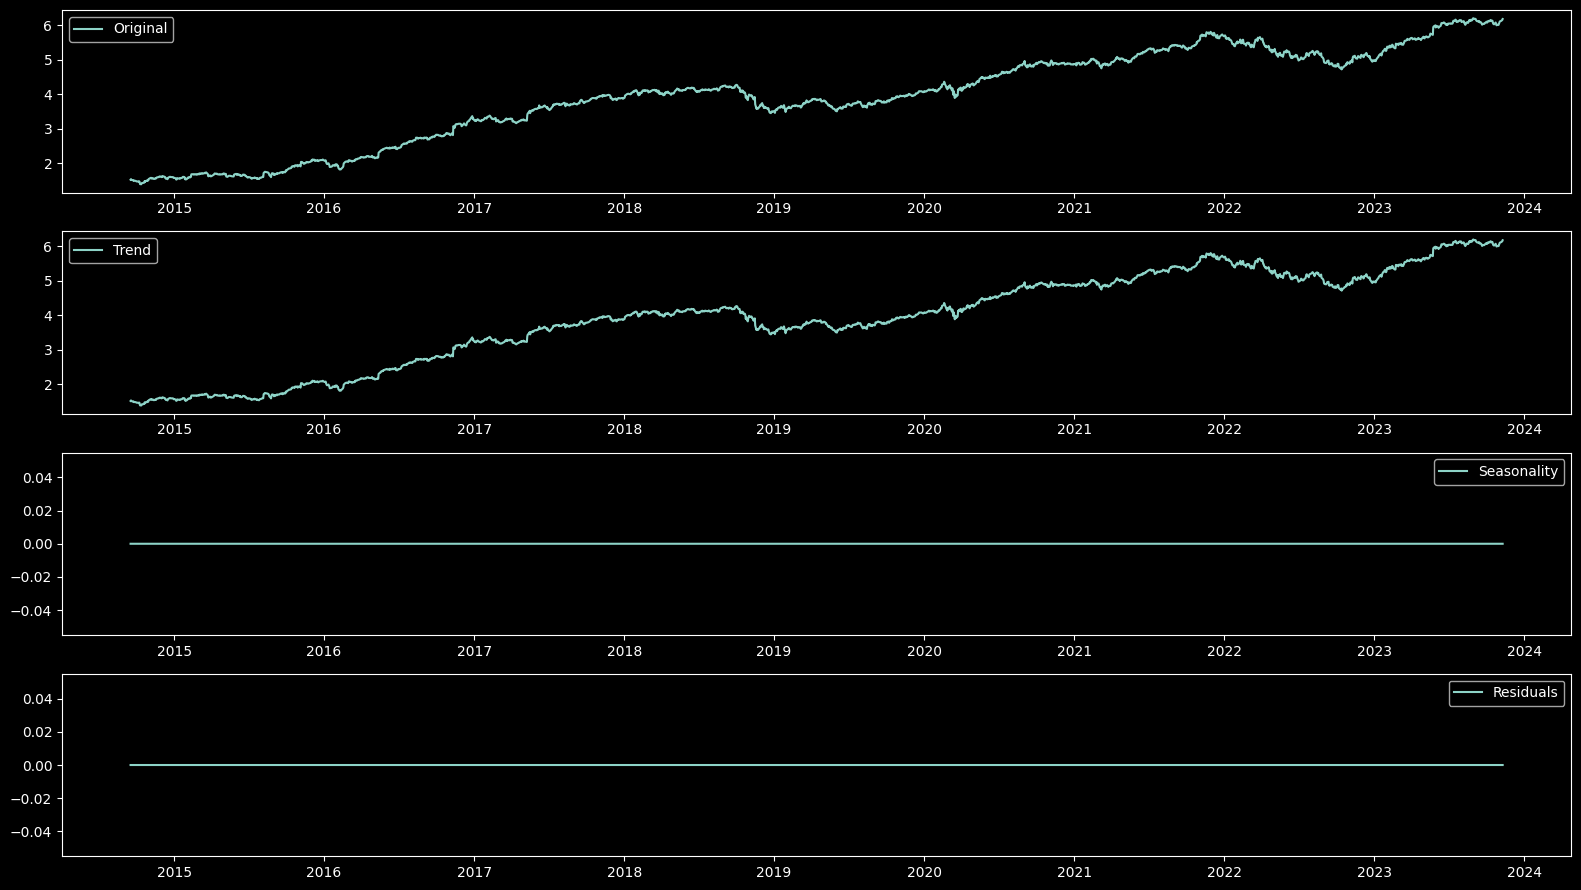

In [41]:
# Create plots  with the appropriate value
decomposition = seasonal_decompose(ts_log, period=1)
# Extracting the trend component from the above result
trend = decomposition.trend
# Extracting the seasonal component from the above result
seasonal = decomposition.seasonal
# Extracting the residual component from the above result
residual = decomposition.resid
# Visualize the plots over time
plt.figure(figsize=(16, 9),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
plt.subplot(411)
# plotting ts_log data over x and y axis
plt.plot(ts_log, label='Original', scalex=True, scaley=True)
# Discribing elements of a plot in a particular area
plt.legend(loc='best', numpoints=None, markerscale=None, markerfirst=True)
plt.subplot(412)
# plotting trend data over x and y axis
plt.plot(trend, label='Trend', scalex=True, scaley=True)
# Discribing elements of a plot in a particular area
plt.legend(loc='best', numpoints=None, markerscale=None, markerfirst=True)
plt.subplot(413)
# plotting seasonal data over x and y axis
plt.plot(seasonal, label='Seasonality', scalex=True, scaley=True)
# Discribing elements of a plot in a particular area
plt.legend(loc='best', numpoints=None, markerscale=None, markerfirst=True)
plt.subplot(414)
# plotting residual data over x and y axis
plt.plot(residual, label='Residuals', scalex=True, scaley=True)
# Discribing elements of a plot in a particular area
plt.legend(loc='best', numpoints=None, markerscale=None, markerfirst=True)
plt.tight_layout()
plt.show()

In [44]:
# Result of Dickey-Fuller test:
print('Dickey-Fuller Test:')
# Conducting test on log-transformed time series data
df_test = adfuller(ts_log, autolag='AIC', maxlag=None, regression='c',store=False, regresults=False)
df_output = pd.Series(df_test[0:4], index=['Test Statistic', 'p-value', 'Lags', 'Number of Observations'])
# Extracting critical values from the test
for k, v in df_test[4].items():
    df_output['Critical Value (%s)' % k] = v
print(df_output)

Dickey-Fuller Test:
Test Statistic              -0.805797
p-value                      0.817413
Lags                         8.000000
Number of Observations    2296.000000
Critical Value (1%)         -3.433201
Critical Value (5%)         -2.862800
Critical Value (10%)        -2.567441
dtype: float64


ACF, PCF

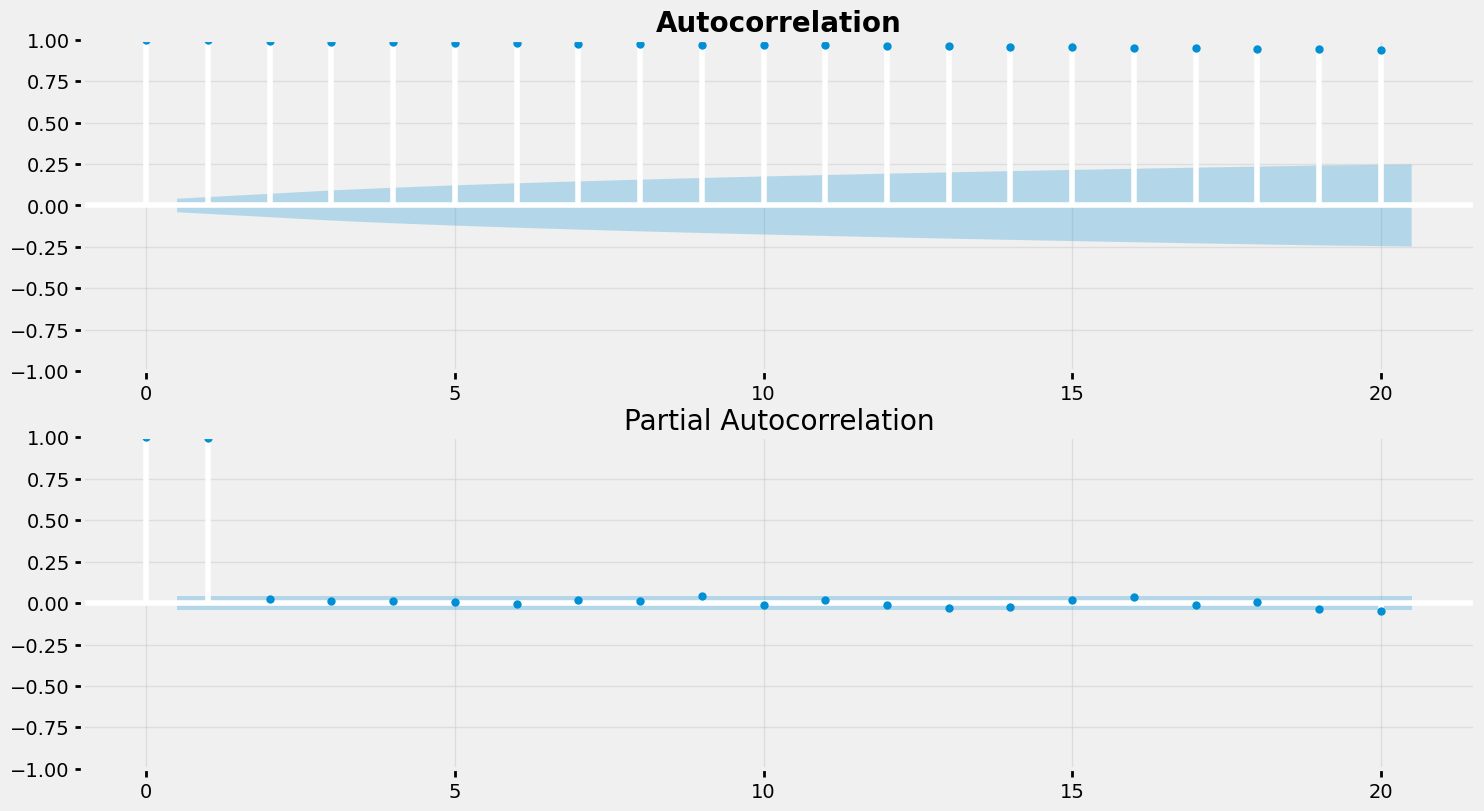

In [47]:
# Importing statsmodels library to find out acf, pcf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Creating ACF and PACF plots
plt.style.use('fivethirtyeight')
# Visualize the plots over time
plt.figure(figsize=(16, 9),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)

axis_1 = plt.subplot(211)
plot_acf(stock_data['Adj Close'], ax=plt.gca(), lags=20)
# setting the title of subplot as auto correlation
plt.title('Autocorrelation', color='black', fontweight='bold', loc='center', pad=None, fontsize=20)
# setting tick parameters for y axis
axis_1.tick_params(axis='y', colors='black',direction='out', length=6, width=2, grid_alpha=0.5)
# setting tick parameters for x axis
axis_1.tick_params(axis='x', colors='black',direction='out', length=6, width=2, grid_alpha=0.5)

axis_2 = plt.subplot(212)
plot_pacf(stock_data['Adj Close'], ax=plt.gca(), lags=20)
# setting tick parameters for y axis
axis_2.tick_params(axis='y', colors='black',direction='out', length=6, width=2, grid_alpha=0.5)
# setting tick parameters for x axis
axis_2.tick_params(axis='x', colors='black',direction='out', length=6, width=2, grid_alpha=0.5)
plt.title('Partial Autocorrelation', color='black')

plt.show()

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2205
Model:                ARIMA(2, 1, 20)   Log Likelihood               -6282.176
Date:                Thu, 23 Nov 2023   AIC                          12610.352
Time:                        16:58:50   BIC                          12741.407
Sample:                             0   HQIC                         12658.236
                               - 2205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8945      0.085     10.553      0.000       0.728       1.061
ar.L2         -0.6066      0.084     -7.182      0.000      -0.772      -0.441
ma.L1         -0.9115      0.085    -10.687      0.0

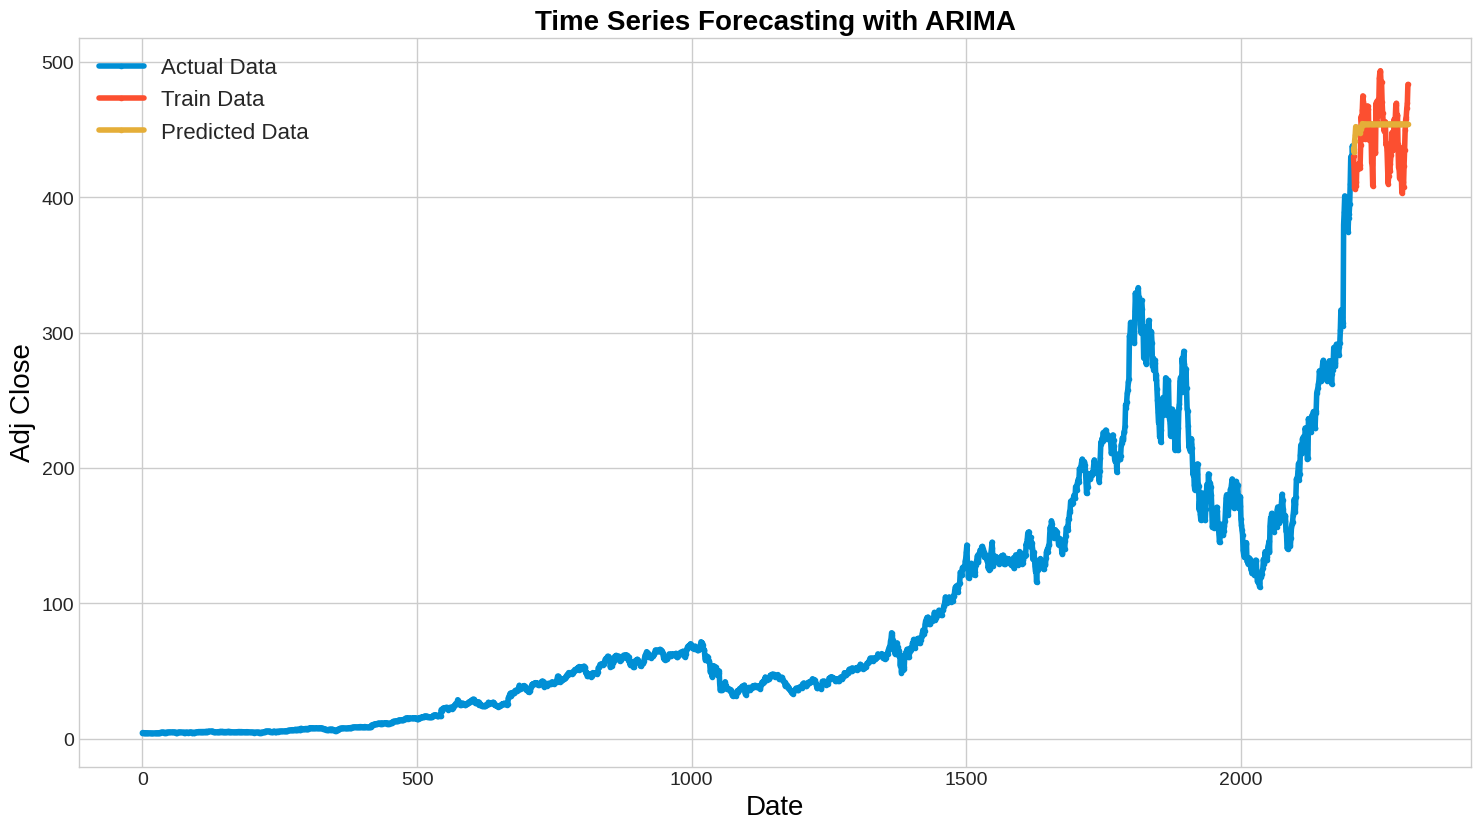

In [66]:
# Import necessary libraries for forecasting the model
# Additional imports for evaluation metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import statistics
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse, meanabs
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings("ignore")

# Replace 'BTC-USD.csv' with your dataset path
df = pd.read_csv('NVDA.csv', parse_dates=[0]) # BTC-USD.csv

# Build train and test set
train_data = df[:len(df) - 100]
test_data = df[len(df) - 100:]

# Build the ARIMA model of order (2, 1, 20) based on the acf and pcf plots
model = ARIMA(train_data['Adj Close'], order=(2, 1, 20))
# fit the arima model to the training data
model_fit = model.fit()
# predict the model based on the fitted model
arima_pred = model_fit.predict(start=len(train_data), end=len(df) - 1, typ="levels").rename("ARIMA Forecast")
# print the statistical information of the model
print(model_fit.summary())
# Use the grid style as seaborn-whitegrid
plt.style.use('seaborn-whitegrid')  # Change to seaborn white grid style
plt.figure(figsize=(16, 9))  # Setting the figure size

# Plot the actual data with a blue line, train data with red line and predict data with yellow line
plt.plot(train_data['Adj Close'], label='Actual Data', marker='.')
plt.plot(test_data['Adj Close'], label='Train Data',  marker='.')
plt.plot(arima_pred, label='Predicted Data', marker='.')

# setting title for the plot
plt.title("Time Series Forecasting with ARIMA", fontweight='bold', color='black', fontsize=20)
# set x axis label
plt.xlabel('Date',  color='black', fontsize=20)
# set y axis label
plt.ylabel('Adj Close',  color='black', fontsize=20)

# Discribing elements of a plot in a particular area
plt.legend(fontsize=16)

# Calculate evaluation metrics of the arima model
arima_mse_error = mean_squared_error(test_data['Adj Close'], arima_pred) # mean square error
print(f'MSE = {arima_mse_error}')
arima_r2_score = r2_score(test_data['Adj Close'], arima_pred) # r squared
print(f'R-squared = {arima_r2_score}')
arima_mae_error = mean_absolute_error(test_data['Adj Close'], arima_pred) # mean absolute error
print(f'MAE = {arima_mae_error}')
arima_mape_error = np.mean(np.abs((test_data['Adj Close'] - arima_pred) / test_data['Adj Close'])) * 100 # mean percentage error
print(f'MAPE = {arima_mape_error}')
arima_mdape_error = np.median(np.abs((test_data['Adj Close'] - arima_pred) / test_data['Adj Close'])) * 100 # mean absolute percentage error
print(f'MDAPE = {arima_mdape_error}')

plt.show()

LSTM Model

In [68]:
!pip install tensorflow

Epoch 1/100
29/29 [==============================] - 8s 5ms/step - loss: 0.0227
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 4.5091e-04
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 4.6498e-04
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 4.1370e-04
Epoch 8/100
29/29 [==============================] - 0s 6ms/step - loss: 3.8829e-04
Epoch 9/100
29/29 [==============================] - 0s 5ms/step - loss: 3.8040e-04
Epoch 10/100
29/29 [==============================] - 0s 5ms/step - loss: 3.6884e-04
Epoch 11/100
29/29 [==============================] - 0s 6ms/step - loss: 3.4931e-04
Epoch 12/100
29/29 [==============================] - 0s 6ms/step - loss: 3.4889e-04
Epoch

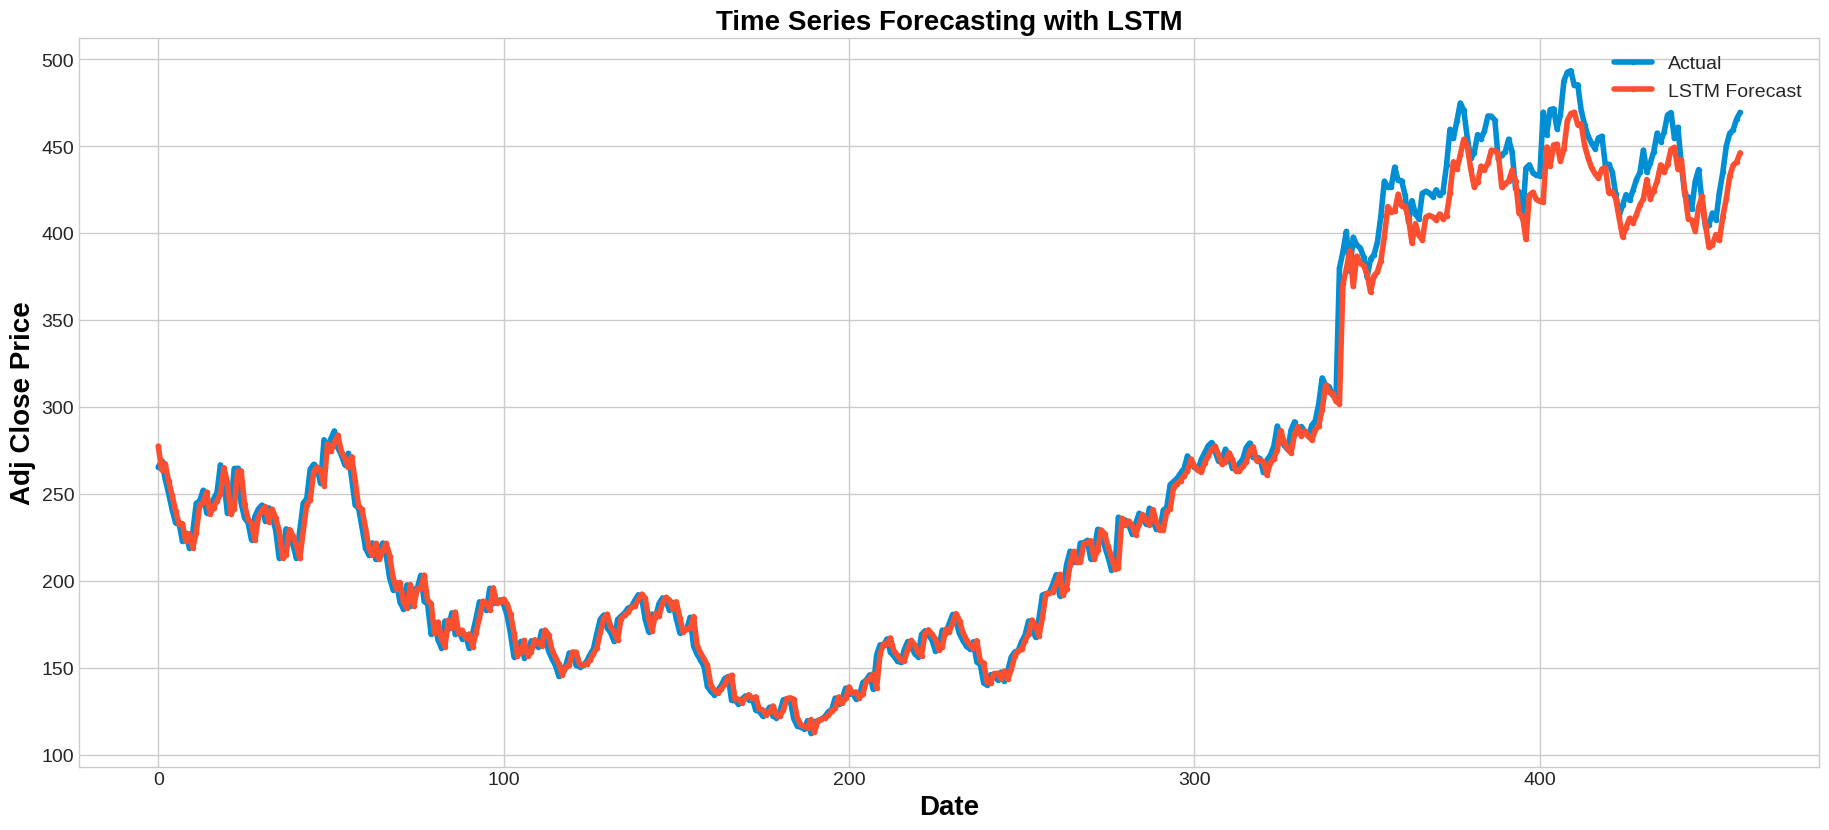

In [69]:
# Importing necessary libraries into the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Replace 'BTC-USD.csv' with your dataset path
data = pd.read_csv('NVDA.csv', parse_dates=[0])

# Scale values to range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Split data into training and test datasets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

# Convert data into sequences (time steps) for LSTM model
def create_dataset(dataset, time_step=1): # defined create_dataset for the LSTM model
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 1 # setting the time step to 1 for creating sequence
# creating train and test data set with sequence
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential(layers=None, name=None)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and fit the model on the dataset
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64) # number of times the algorithm learns

# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)) # root mean square error
print(f"Root Mean Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions) # mean absolute error
print(f"Mean Absolute Error (MAE): {mae}")
r2 = r2_score(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions) # r score
print(f"R2 Score: {r2}")
mape = mean_absolute_percentage_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions) # mean absolute percentage error
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
mdape = np.mean(np.abs((scaler.inverse_transform(y_test.reshape(-1, 1)) - predictions) / scaler.inverse_transform(y_test.reshape(-1, 1))))  # mean deviation
print(f"Mean Deviation (MDAPE): {mdape * 100:.2f}%")

# Create a DataFrame with Actual and Predicted values
df_result = pd.DataFrame({'Actual Values': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(),
                           'Predicted Values': predictions.flatten()})

# Plot the results
plt.figure(figsize=(20, 9),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
plt.plot(df_result['Actual Values'], marker='.', label="Actual")
plt.plot(df_result['Predicted Values'], marker='.', label="LSTM Forecast")
# set title for the plot
plt.title("Time Series Forecasting with LSTM", fontweight='bold', color='black',fontsize=20)
# set x axis label
plt.xlabel('Date', fontweight='bold', color='black',fontsize=20)
# set y axis label
plt.ylabel('Adj Close Price', fontweight='bold', color='black',fontsize=20)
# Discribing elements of a plot in a particular area
plt.legend(loc='best', numpoints=None, markerscale=None, markerfirst=True)
plt.show()

In [3]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.2 MB/s eta 0:00:00


Comparision of Models

In [ ]:
# Importing necessary libraries into the model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from pmdarima import auto_arima

# Replace 'BTC-USD.csv' with your dataset path
data = pd.read_csv('NVDA.csv', parse_dates=[0])

# Scale the values to range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Split data into training and test datasets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

In [ ]:
# Convert data into sequences (time steps) for LSTM model
def create_dataset(dataset, time_step=1):  # defined create_dataset for the LSTM model
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 1 # setting the time step to 1 for creating sequence
# creating train and test data set with sequence
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Building of LSTM model
model = Sequential(layers=None, name=None) # sequential modelling 
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and fit the model on the dataset
model.compile(optimizer='adam', loss='mean_squared_error') # compile
model.fit(X_train, y_train, epochs=100, batch_size=64)  # number of times the algorithm learns

# Make predictions on the test dataset using LSTM
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

In [ ]:
# Forecasting ARIMA model
arima_model = auto_arima(np.squeeze(train), suppress_warnings=True, stepwise=True)
arima_predictions, conf_int = arima_model.predict(n_periods=test_size, return_conf_int=True) # predictions, coeff 

# Invert scaling for ARIMA predictions
arima_predictions = scaler.inverse_transform(arima_predictions.reshape(-1, 1))

Epoch 1/100
29/29 [==============================] - 4s 5ms/step - loss: 0.0221
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 4.9801e-04
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 4.5294e-04
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 3.8382e-04
Epoch 8/100
29/29 [==============================] - 0s 5ms/step - loss: 3.7956e-04
Epoch 9/100
29/29 [==============================] - 0s 5ms/step - loss: 3.3532e-04
Epoch 10/100
29/29 [==============================] - 0s 5ms/step - loss: 3.3693e-04
Epoch 11/100
29/29 [==============================] - 0s 5ms/step - loss: 3.7286e-04
Epoch 12/100
29/29 [==============================] - 0s 5ms/step - loss: 2.9142e-04
Epoch

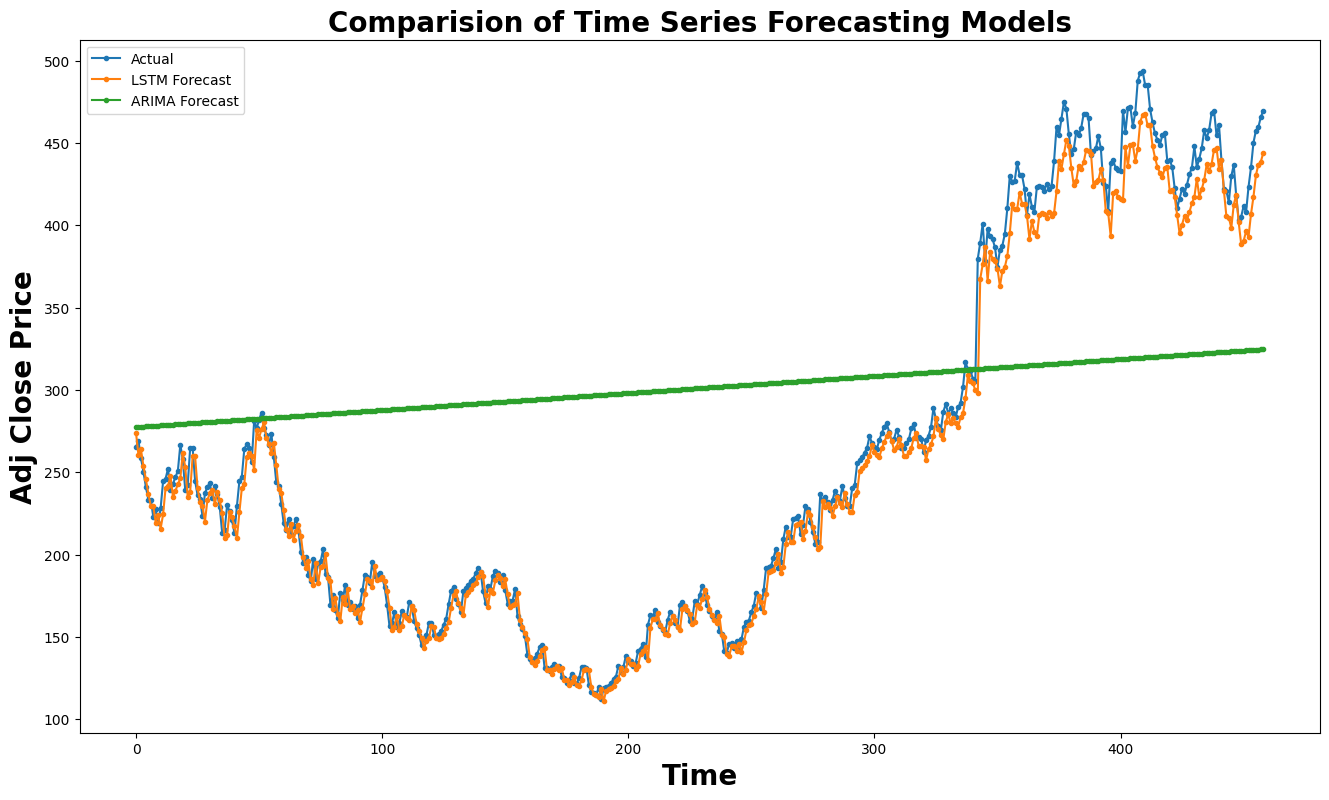

In [6]:
# Ensure the lengths of both LSTM and ARIMA predictions are the same
min_length = min(len(lstm_predictions), len(arima_predictions))
lstm_predictions = lstm_predictions[:min_length]
arima_predictions = arima_predictions[:min_length]

# Combining LSTM and ARIMA predictions for plotting
combined_predictions = pd.DataFrame({'LSTM': lstm_predictions.flatten()[:min_length], 'ARIMA': arima_predictions.flatten()[:min_length]})

# Create a DataFrame with Actual and Predicted values for LSTM
df_result_lstm = pd.DataFrame({'Actual Values': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(),
                               'LSTM Predicted Values': lstm_predictions.flatten()[:min_length]})

# Plot the results
plt.figure(figsize=(16, 9),facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, constrained_layout=None, layout=None)
# plotting actual data over time period in x axis
plt.plot(df_result_lstm['Actual Values'], marker='.', label="Actual", scalex=True, scaley=True)
# plotting actual dataLSTM Predicted Values over time period in x axis
plt.plot(df_result_lstm['LSTM Predicted Values'], marker='.', label="LSTM Forecast", scalex=True, scaley=True)
# plotting ARIMA prediction over x and y axis
plt.plot(combined_predictions['ARIMA'], marker='.', label="ARIMA Forecast", scalex=True, scaley=True)
# Title of the plot
plt.title("Comparision of Time Series Forecasting Models", fontweight='bold', color='black', fontsize=20)
# Set X axis label
plt.xlabel('Time', fontweight='bold', color='black',fontsize=20)
# Set Y axis label
plt.ylabel('Adj Close Price', fontweight='bold', color='black',fontsize=20)
# Discribing elements of a plot in a particular area
plt.legend(loc='best', numpoints=None, markerscale=None, markerfirst=True)
plt.show()


## Cross Data Analysis ARIMA

In [16]:
# Importing basic libraries in python

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load datasets NVDA and BTC-USD data 
nvda_d1 = pd.read_csv('NVDA.csv', skipfooter=0, nrows=None, na_values=None)  #NVDA data
btc_d1 = pd.read_csv('BTC-USD.csv', skipfooter=0, nrows=None, na_values=None) #BTC-USD data

# Assuming both datasets have 'Date' and 'Close' columns
nvda_d1['Date'] = pd.to_datetime(nvda_d1['Date'], utc=False, format=None) # converting to date time format
btc_d1['Date'] = pd.to_datetime(btc_d1['Date'], utc=False, format=None) # converting to date time format

<ipython-input-16-6a8bad9c527a>:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  btc_d1['Date'] = pd.to_datetime(btc_d1['Date'], utc=False, format=None) # converting to date time format


In [17]:
# Merge datasets on the 'Date' column
merged_data = pd.merge(nvda_d1, btc_d1, on='Date', how='inner', copy=None, indicator=False, validate=None)

# Assigning the columns to the variables
np = merged_data['Close_x'] # close_x is the NVDA closing prices column
bp = merged_data['Close_y'] # Close_y is BTC-USD closing prices column

# Fit ARIMA model, try order( 1,1,1)
am = ARIMA(bp, order=(2,1,20), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1)  # You may need to tune the order parameter
arima_model_result = am.fit()

# Predicting the model
arima_model_predictions = arima_model_result.predict(start=len(np), end=len(np) + len(np) - 1, typ='levels')

# Evaluate ARIMA model
mse_arima = mean_squared_error(bp, arima_model_predictions) # mean square error
print(f'Mean Squared Error ARIMA : {mse_arima}')

ARIMA Mean Squared Error: 872666251.7781233


C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


## Cross Data Analysis LSTM

In [18]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Assigning the columns to the variables
np = merged_data['Close_x'] # close_x is the NVDA closing prices column
bp = merged_data['Close_y'] # Close_y is BTC-USD closing prices column

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'register_load_context_function'

In [ ]:
# Scale values to range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1), copy=True, clip=False) # transform features by scaling the model
ns = scaler.fit_transform(np.array(np).reshape(-1, 1)) # fit the data and then transform it
bs = scaler.fit_transform(np.array(bp).reshape(-1, 1)) # fit the data and then transform it

# Convert the data into sequences (time steps) for LSTM model
def cd(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 1  # setting the time step to 1 for creating sequence
# creating train and test data set with sequence
X_train, y_train = cd(ns, time_step)
X_test, y_test = cd(bs, time_step)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # reshape

In [ ]:
# Building of  LSTM model
lstm_model = Sequential(layers=None, name=None) # sequential modelling
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

# Compile and fit the model on the dataset
lstm_model.compile(optimizer='adam', loss='mean_squared_error') # compile
lstm_model.fit(X_train, y_train, epochs=100, batch_size=64)  # number of times the algorithm learns

# Make predictions on the test dataset
lstm_predictions = lstm_model.predict(X_test)  # lstm model prediction
lstm_predictions = scaler.inverse_transform(lstm_predictions) # inverse transform

# LSTM Model Evaluation 
mse_lstm = mean_squared_error(btc_prices[1:], lstm_predictions) # mean square error
print(f'Mean Squared Error LSTM : {mse_lstm}')